In [60]:
import numpy as np
import pandas as pd

In [61]:
train_data = pd.read_csv("data/train_data.csv")

In [62]:
# Ensure TimeUtc is a datetime type
train_data['TimeUtc'] = pd.to_datetime(train_data['TimeUtc'])

# Extract components
train_data['Year'] = train_data['TimeUtc'].dt.year
train_data['Month'] = train_data['TimeUtc'].dt.month
train_data['Day'] = train_data['TimeUtc'].dt.day
train_data['Hour'] = train_data['TimeUtc'].dt.hour
train_data['Minute'] = train_data['TimeUtc'].dt.minute
train_data['Second'] = train_data['TimeUtc'].dt.second

In [63]:
# Separate weekday and weekend days
train_data['Weekday'] = train_data['TimeUtc'].dt.dayofweek
train_data['WeekendFlag'] = (train_data['TimeUtc'].dt.weekday >= 5).astype(int)

# Categorize different times of day into periods
time_bins = [0, 6, 12, 18, 24]  # Define time_bins as 0-6, 6-12, 12-18, 18-24
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
train_data['PeriodOfDay'] = pd.cut(train_data['TimeUtc'].dt.hour, bins=time_bins, labels=time_labels, right=False)

# Remove the original Timestamp column to avoid redundancy
train_data.drop('TimeUtc', axis=1, inplace=True)

In [64]:
train_data.head()

,UserID,QuestionTiming,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue,Year,Month,Day,Hour,Minute,Second,Weekday,WeekendFlag,PeriodOfDay
0,p1,User Initiated,NaN,NaN,2,NaN,NaN,Wellbeing,509.0,2022,8,18,22,55,27,3,0,Evening
1,p1,System Initiated,NaN,NaN,0,NaN,NaN,Wellbeing,653.0,2022,8,18,23,38,31,3,0,Evening
2,p1,User Initiated,Career,HOME_VAN,1,WASH_PWVan,1.000000,Wellbeing,705.0,2022,8,18,23,39,24,3,0,Evening
3,p1,System Initiated,Career,RESIDENTIALSMALL_BACKYARD,6,WASH_PWVan,0.168267,Wellbeing,817.0,2022,8,18,23,45,1,3,0,Evening
4,p1,System Initiated,Career,RESIDENTIALSMALL_BACKYARD,13,WASH_PWVan,0.429364,Wellbeing,810.0,2022,8,18,23,51,22,3,0,Evening


In [65]:
#encoding for TimeOfDay.
train_data = pd.get_dummies(train_data, columns=['PeriodOfDay'], drop_first=False)

In [66]:
train_data.head()

,UserID,QuestionTiming,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue,Year,...,Day,Hour,Minute,Second,Weekday,WeekendFlag,PeriodOfDay_Night,PeriodOfDay_Morning,PeriodOfDay_Afternoon,PeriodOfDay_Evening
0,p1,User Initiated,NaN,NaN,2,NaN,NaN,Wellbeing,509.0,2022,...,18,22,55,27,3,0,False,False,False,True
1,p1,System Initiated,NaN,NaN,0,NaN,NaN,Wellbeing,653.0,2022,...,18,23,38,31,3,0,False,False,False,True
2,p1,User Initiated,Career,HOME_VAN,1,WASH_PWVan,1.000000,Wellbeing,705.0,2022,...,18,23,39,24,3,0,False,False,False,True
3,p1,System Initiated,Career,RESIDENTIALSMALL_BACKYARD,6,WASH_PWVan,0.168267,Wellbeing,817.0,2022,...,18,23,45,1,3,0,False,False,False,True
4,p1,System Initiated,Career,RESIDENTIALSMALL_BACKYARD,13,WASH_PWVan,0.429364,Wellbeing,810.0,2022,...,18,23,51,22,3,0,False,False,False,True


## 1. Weekday

In [29]:
weekday_unique_values = train_data['Weekday'].unique()
print(weekday_unique_values)

from scipy.stats import f_oneway

grouped_data = [train_data[train_data['Weekday'] == i]['ResponseValue'] for i in range(7)]

f_stat, p_val = f_oneway(*grouped_data)
print('F-statistic:', f_stat)
print('P-value:', p_val)


[3 4 5 6 0 2 1]
F-statistic: 9.982346547601745
P-value: 4.757252476160118e-11


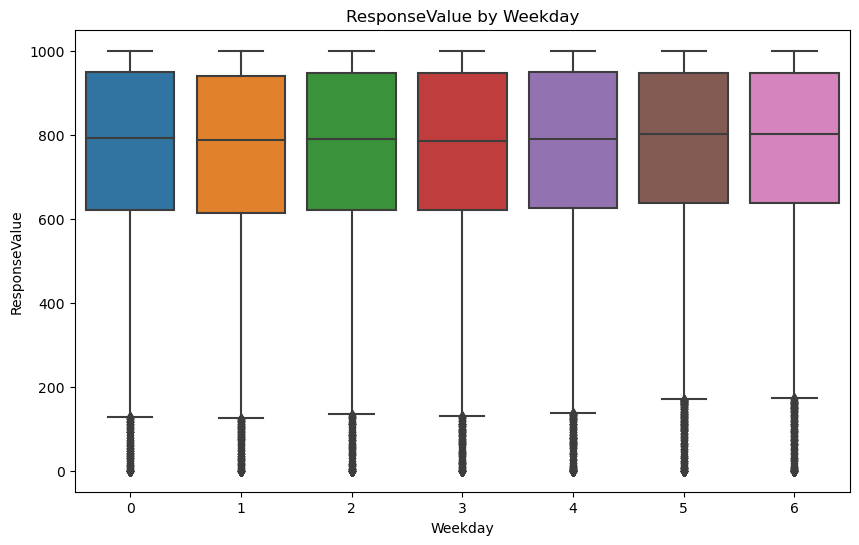

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='ResponseValue', data=train_data)
plt.title('ResponseValue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('ResponseValue')
plt.show()



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -4.5432 0.4142 -11.2391  2.1527  False
     0      2  -0.6859 0.9999   -7.377  6.0052  False
     0      3  -3.1834 0.7864  -9.7533  3.3864  False
     0      4   0.2729    1.0  -6.0571  6.6029  False
     0      5   6.4562 0.0382   0.1944  12.718   True
     0      6   8.4067 0.0017   2.0817 14.7317   True
     1      2   3.8573 0.6415  -2.9846 10.6992  False
     1      3   1.3598 0.9969  -5.3636  8.0832  False
     1      4   4.8161 0.3018  -1.6731 11.3053  False
     1      5  10.9994    0.0   4.5767 17.4221   True
     1      6  12.9499    0.0   6.4655 19.4343   True
     2      3  -2.4975 0.9295  -9.2161  4.2211  False
     2      4   0.9588 0.9995  -5.5255  7.4431  False
     2      5   7.1421 0.0179   0.7243 13.5598   True
     2      6   9.0926 0.0007   2.6132 15.5721   True
     3      4   3.4563 0.680

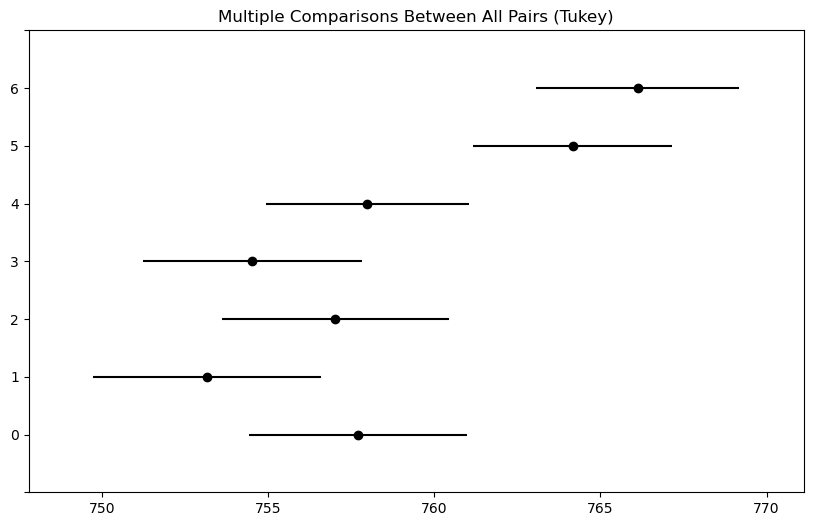

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=train_data['ResponseValue'], groups=train_data['Weekday'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()
plt.show()


### Suggestion
Significant difference: There is a significant difference in ResponseValue between specific Weekday groups. In particular, the ResponseValue is significantly different on Sunday (Group 6) compared to other days (0, 1, 2, 3, 4, 5).
The effect of Sunday is obvious: The significant difference between Sunday (Group 6) and other days shows that the ResponseValue of Sunday is significantly higher than that of other days.

## 2. Weekend

[0 1]
Point-Biserial Correlation: 0.019626286413512523, P-value: 6.187889079493329e-13
Mean on Weekdays: 756.1773873369965, Mean on Weekends: 765.1190305497098
T-statistic: -7.196983488263627, P-value: 6.187889079510141e-13


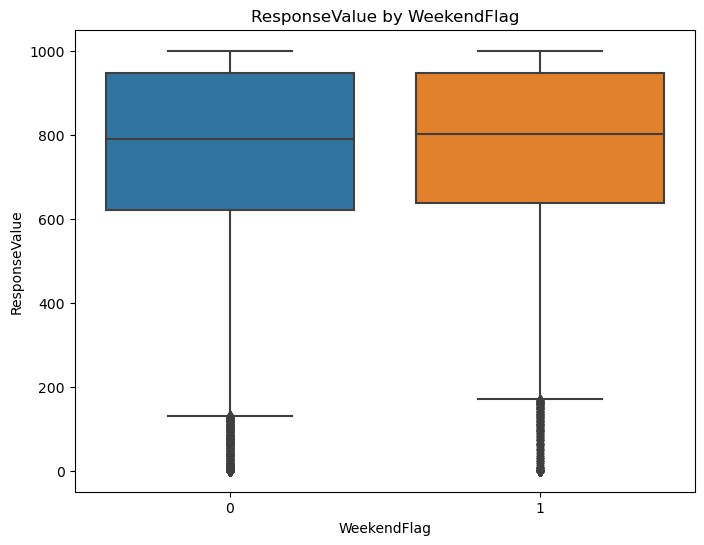

In [35]:
WeekendFlag_unique_values = train_data['WeekendFlag'].unique()
print(WeekendFlag_unique_values)

import pandas as pd
from scipy.stats import pointbiserialr, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt


correlation, p_value = pointbiserialr(train_data['WeekendFlag'], train_data['ResponseValue'])
print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")

mean_weekday = train_data[train_data['WeekendFlag'] == 0]['ResponseValue'].mean()
mean_weekend = train_data[train_data['WeekendFlag'] == 1]['ResponseValue'].mean()
print(f"Mean on Weekdays: {mean_weekday}, Mean on Weekends: {mean_weekend}")

group_weekday = train_data[train_data['WeekendFlag'] == 0]['ResponseValue']
group_weekend = train_data[train_data['WeekendFlag'] == 1]['ResponseValue']
t_stat, p_val = ttest_ind(group_weekday, group_weekend)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekendFlag', y='ResponseValue', data=train_data)
plt.title('ResponseValue by WeekendFlag')
plt.xlabel('WeekendFlag')
plt.ylabel('ResponseValue')
plt.show()



### Suggestion
Although the linear correlation between WeekendFlag and ResponseValue is very weak, mean comparison and t-test found that there is a significant difference in ResponseValue between weekdays and weekends, and this difference is statistically significant.

## 3. PeriodOfDay

In [67]:
import statsmodels.formula.api as smf

formula = 'ResponseValue ~ PeriodOfDay_Afternoon + PeriodOfDay_Evening + PeriodOfDay_Night'

model = smf.ols(formula, data=train_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ResponseValue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.86
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.13e-09
Time:                        19:25:57   Log-Likelihood:            -9.1126e+05
No. Observations:              134420   AIC:                         1.823e+06
Df Residuals:                  134416   BIC:                         1.823e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Suggestion
PeriodOfDay_Afternoon has a significant negative impact on ResponseValue. 
Compared with Morning, the ResponseValue of Afternoon period is about 4.3 lower on average.

PeriodOfDay_Evening has no significant impact on ResponseValue. 
Compared with Morning, the ResponseValue of Evening period does not change significantly.

PeriodOfDay_Night has a significant positive impact on ResponseValue. 
Compared to Morning, the ResponseValue in Night period increases by about 5.8 on average.

## 1.3 CurrentTask

In [10]:
from category_encoders import TargetEncoder

train_data = pd.read_csv("data/train_data.csv")

encoder = TargetEncoder()
train_data['CurrentTask_encoded'] = encoder.fit_transform(train_data['CurrentTask'], 
                                                               train_data['ResponseValue'])


train_data.drop(['CurrentTask'], axis=1, inplace=True)

print(train_data[['CurrentTask_encoded']].head())

# encoding and drop original columns.

   CurrentTask_encoded
0           679.409393
1           679.409393
2           745.809113
3           765.158454
4           765.158454


In [16]:
correlation = train_data['CurrentTask_encoded'].corr(train_data['ResponseValue'])
print(f'Correlation between encoded CurrentTask and ResponseValue: {correlation}')

Correlation between encoded CurrentTask and ResponseValue: 0.14800095938102786


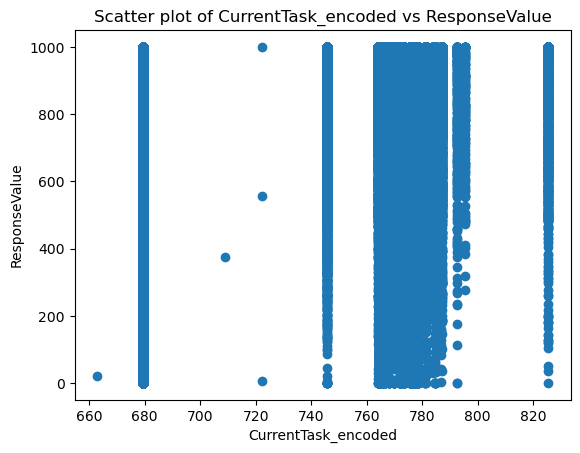

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train_data['CurrentTask_encoded'], train_data['ResponseValue'])
plt.xlabel('CurrentTask_encoded')
plt.ylabel('ResponseValue')
plt.title('Scatter plot of CurrentTask_encoded vs ResponseValue')
plt.show()


### Interpretation
1) Correlation close to 0, indicating a weak positive correlation.
2) Since the distribution range of ResponseValue in each strip is very wide, it means that the impact of CurrentTask on ResponseValue is more complex and may be affected by other factors.